In [1024]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1025]:
df = pd.read_excel("ENB2012_data.xlsx")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [1026]:
X = df.iloc[:, 0:8].values # features
y1 = df.iloc[:, 8].values # target: Heating Load
y2 = df.iloc[:, 9].values # target: Cooling Load

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [1027]:
from sklearn.model_selection import train_test_split

# Splits the featires and the heating/cooling load into 
X_train_y1, X_test_y1, y1_train, y1_test = train_test_split(X, y1, test_size = 0.30)
X_train_y2, X_test_y2, y2_train, y2_test = train_test_split(X, y2, test_size = 0.30)

# Linear Regression

In [1028]:
from sklearn.linear_model import LinearRegression

# fits the training and test sets into a linear regression model and predict the values for heating/cooling loads
lin_reg_Xy1 = LinearRegression()
lin_reg_Xy1.fit(X_train_y1, y1_train)
y1_pred = lin_reg_Xy1.predict(X_test_y1)

lin_reg_Xy2 = LinearRegression()
lin_reg_Xy2.fit(X_train_y2, y2_train)
y2_pred = lin_reg_Xy2.predict(X_test_y2)

Text(367.48863636363626, 0.5, 'True Values')

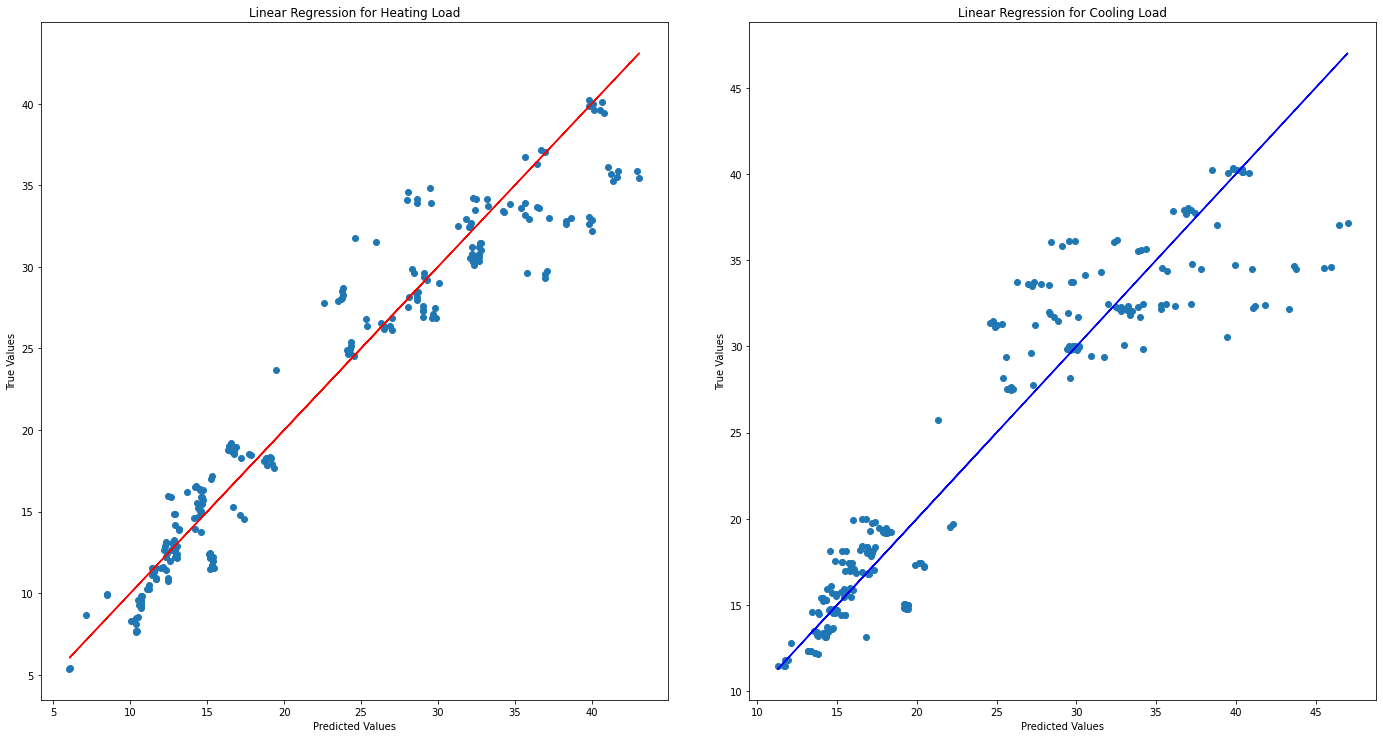

In [1029]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
f.tight_layout(w_pad=1.0)
f.set_figwidth(20)

# plotting predicted values for heating/cooling for the features
ax1.scatter(y1_test, y1_pred)
ax1.plot(y1_test, y1_test, 'red')
ax1.set_title("Linear Regression for Heating Load")
ax1.set_xlabel("Predicted Values")
ax1.set_ylabel("True Values")

ax2.scatter(y2_test, y2_pred)
ax2.plot(y2_test, y2_test, 'blue')
ax2.set_title("Linear Regression for Cooling Load")
ax2.set_xlabel("Predicted Values")
ax2.set_ylabel("True Values")

In [1030]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

y1_mse = mean_squared_error(y1_test, y1_pred)
y1_r2 = r2_score(y1_test, y1_pred)

y2_mse = mean_squared_error(y2_test, y2_pred)
y2_r2 = r2_score(y2_test, y2_pred)

print("Mean squared error for heating load predictions: ", y1_mse)
print("R2 Score for heating load predictions: ", y1_r2)
print("\n")
print("Mean squared error for cooling load predictions: ", y2_mse)
print("R2 Score for cooling load predictions: ", y2_r2)

Mean squared error for heating load predictions:  7.412723406804143
R2 Score for heating load predictions:  0.9289089216619242


Mean squared error for cooling load predictions:  11.091531913504145
R2 Score for cooling load predictions:  0.8787393918931318
